In [6]:
# Load stored variables
%store -r sales_df

## Are any sales agent lagging behind?

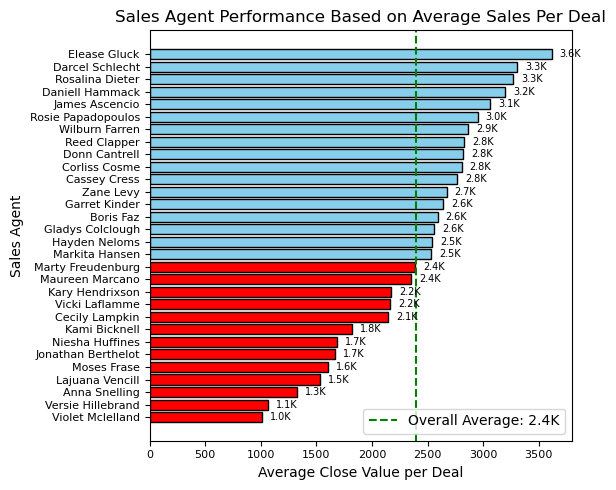

In [10]:
# Calculate average sales per deal for each agent
average_sales_by_agent = sales_df[sales_df['deal_stage'] == 'Won'].groupby('sales_agent')['close_value'].mean()

# Calculate the overall average sales per deal
overall_average_sales = average_sales_by_agent.mean()

# Sort average sales by agent in ascending order
average_sales_by_agent = average_sales_by_agent.sort_values()

# Create a color map: agents beAre any sales agent lagging behind?
# low average in red, others in blue
colors = ['red' if value < overall_average_sales else 'skyblue' for value in average_sales_by_agent]

# Create the horizontal bar chart
fig, ax = plt.subplots(figsize=(6, 5))
bars = ax.barh(average_sales_by_agent.index, average_sales_by_agent.values, color=colors, edgecolor='black')

# Add a vertical line for the overall average sales
ax.axvline(overall_average_sales, color='green', linestyle='--', label=f'Overall Average: {overall_average_sales/1000:,.1f}K')

# Add labels to the bars
for bar in bars:
    width = bar.get_width()
    ax.text(width + 0.02 * average_sales_by_agent.max(), bar.get_y() + bar.get_height() / 2,
            f'{width/1000:,.1f}K', va='center', ha='left', fontsize=7)

# Set titles and labels
ax.set_title('Sales Agent Performance Based on Average Sales Per Deal', fontsize=12)
ax.set_xlabel('Average Close Value per Deal', fontsize=10)
ax.set_ylabel('Sales Agent', fontsize=10)
ax.tick_params(axis='y', labelsize=8)
ax.tick_params(axis='x', labelsize=8)

# Add a legend
ax.legend(loc='lower right')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

## Another way to see it

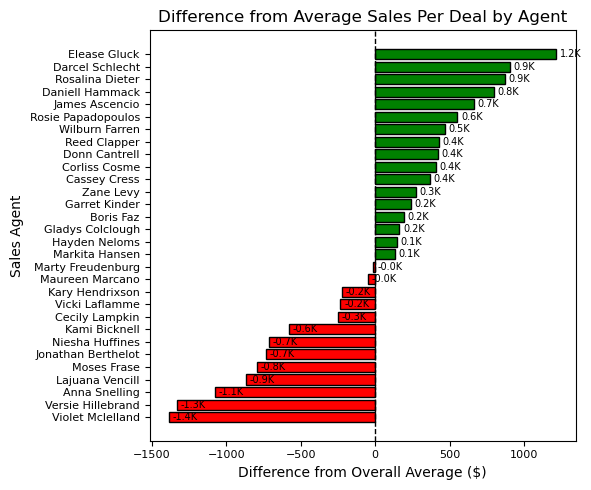

In [12]:
# Calculate average sales per deal for each agent
average_sales_by_agent = sales_df[sales_df['deal_stage'] == 'Won'].groupby('sales_agent')['close_value'].mean()

# Calculate the overall average sales per deal
overall_average_sales = average_sales_by_agent.mean()

# Calculate the difference from the overall average
difference_from_average = average_sales_by_agent - overall_average_sales

# Sort the differences for a cleaner visualization
difference_from_average = difference_from_average.sort_values()

# Create a color map: red for below average, green for above average
colors = ['red' if diff < 0 else 'green' for diff in difference_from_average]

# Create the horizontal bar chart
fig, ax = plt.subplots(figsize=(6, 5))
bars = ax.barh(difference_from_average.index, difference_from_average.values, color=colors, edgecolor='black')

# Add labels to the bars
for bar in bars:
    width = bar.get_width()
    ax.text(width + (0.02 * difference_from_average.max()), bar.get_y() + bar.get_height() / 2,
            f'{width/1000:,.1f}K', va='center', ha='left', fontsize=7)

# Add a vertical line at 0 for reference
ax.axvline(0, color='black', linestyle='--', linewidth=1)

# Set titles and labels
ax.set_title('Difference from Average Sales Per Deal by Agent', fontsize=12)
ax.set_xlabel('Difference from Overall Average ($)', fontsize=10)
ax.set_ylabel('Sales Agent', fontsize=10)
ax.tick_params(axis='y', labelsize=8)
ax.tick_params(axis='x', labelsize=8)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

#### We can see that 8 sales agents are 500 or more below the overall average close amount, and 3 of them are 1K or more below this average.